In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('C:\\Users\\user\\saurabh sir pandas\\ML\\insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.ndim

2

In [5]:
df.shape

(1338, 7)

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_18892\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


C:\Users\user\AppData\Local\Temp\ipykernel_18892\2271070662.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


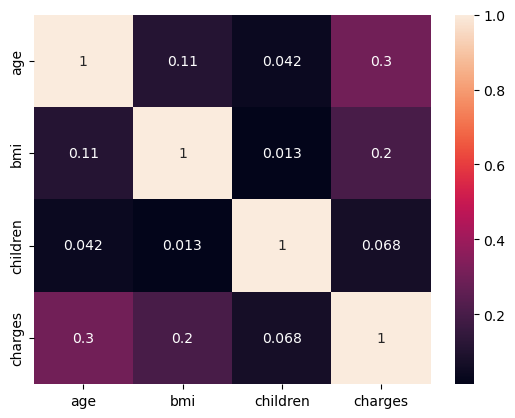

In [11]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [12]:
charges_by_sex = df.groupby('sex')['charges'].sum()

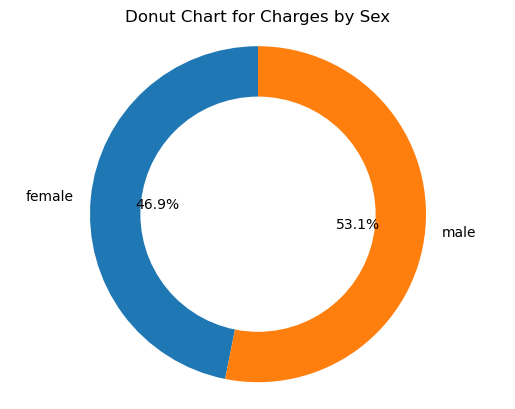

In [13]:
fig, ax = plt.subplots()
ax.pie(charges_by_sex, labels=charges_by_sex.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(center_circle)
ax.axis('equal')
plt.title('Donut Chart for Charges by Sex')
plt.show()

In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
df['age'].shape

(1338,)

In [16]:
ohe=OneHotEncoder(drop='first',sparse=False,dtype=np.int32)

In [17]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [18]:
df['sex'] = ohe.fit_transform(df[['sex']])
df['smoker'] = ohe.fit_transform(df[['smoker']])
df['region'] = ohe.fit_transform(df[['region']])

D:\anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [19]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,0,1629.83350
1336,21,0,25.800,0,0,0,2007.94500


In [20]:
x = df.drop(columns = ['charges'] , axis = 1)
y = df['charges']

In [21]:
from sklearn.model_selection import train_test_split 

In [22]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2 , random_state = 42)

In [23]:
x_train.head() 

,age,sex,bmi,children,smoker,region
560,46,0,19.95,2,0,1
1285,47,0,24.32,0,0,0
1142,52,0,24.86,0,0,0
969,39,0,34.32,5,0,0
486,54,0,21.47,3,0,1


In [24]:
from sklearn.preprocessing import StandardScaler 

In [25]:
sc = StandardScaler() 

In [26]:
x_train_new = sc.fit_transform(x_train) 

In [27]:
np.round(x_train.describe() , 1) 

,age,sex,bmi,children,smoker,region
count,1070.0,1070.0,1070.0,1070.0,1070.0,1070.0
mean,39.4,0.5,30.6,1.1,0.2,0.2
std,14.1,0.5,6.0,1.2,0.4,0.4
min,18.0,0.0,16.0,0.0,0.0,0.0
25%,27.0,0.0,26.2,0.0,0.0,0.0
50%,39.5,1.0,30.2,1.0,0.0,0.0
75%,51.0,1.0,34.5,2.0,0.0,0.0
max,64.0,1.0,53.1,5.0,1.0,1.0


In [28]:
x_train_new

array([[ 0.47222651, -1.0246016 , -1.75652513,  0.73433626, -0.50874702,
         1.78316783],
       [ 0.54331294, -1.0246016 , -1.03308239, -0.91119211, -0.50874702,
        -0.56079971],
       [ 0.8987451 , -1.0246016 , -0.94368672, -0.91119211, -0.50874702,
        -0.56079971],
       ...,
       [ 1.3252637 ,  0.97598911, -0.89153925, -0.91119211, -0.50874702,
        -0.56079971],
       [-0.16755139, -1.0246016 ,  2.82086429,  0.73433626,  1.96561348,
        -0.56079971],
       [ 1.1120044 ,  0.97598911, -0.10932713, -0.91119211, -0.50874702,
        -0.56079971]])

In [29]:
x_train_new.shape

(1070, 6)

In [30]:
x_train.shape

(1070, 6)

In [31]:
x_train_new2 = pd.DataFrame(x_train_new , columns = x_train.columns) 

In [32]:
x_train_new2

,age,sex,bmi,children,smoker,region
0,0.472227,-1.024602,-1.756525,0.734336,-0.508747,1.783168
1,0.543313,-1.024602,-1.033082,-0.911192,-0.508747,-0.560800
2,0.898745,-1.024602,-0.943687,-0.911192,-0.508747,-0.560800
3,-0.025379,-1.024602,0.622393,3.202629,-0.508747,-0.560800
4,1.040918,-1.024602,-1.504893,1.557100,-0.508747,1.783168
...,...,...,...,...,...,...
1065,-1.518194,-1.024602,0.130717,2.379865,-0.508747,-0.560800
1066,-0.025379,-1.024602,-1.107579,3.202629,-0.508747,-0.560800
1067,1.325264,0.975989,-0.891539,-0.911192,-0.508747,-0.560800
1068,-0.167551,-1.024602,2.820864,0.734336,1.965613,-0.560800


In [33]:
np.round(x_train_new2.describe() , 1) 

,age,sex,bmi,children,smoker,region
count,1070.0,1070.0,1070.0,1070.0,1070.0,1070.0
mean,-0.0,-0.0,-0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.5,-1.0,-2.4,-0.9,-0.5,-0.6
25%,-0.9,-1.0,-0.7,-0.9,-0.5,-0.6
50%,0.0,1.0,-0.1,-0.1,-0.5,-0.6
75%,0.8,1.0,0.7,0.7,-0.5,-0.6
max,1.8,1.0,3.7,3.2,2.0,1.8


In [34]:
from sklearn.ensemble import RandomForestRegressor 

In [35]:
rf = RandomForestRegressor() 

In [36]:
rf.fit(x_train , y_train) 

RandomForestRegressor()

In [37]:
y_pred = rf.predict(x_test) 

In [38]:
from sklearn.metrics import r2_score 

In [39]:
r2_score(y_test , y_pred) 

0.8581096464739488

In [40]:
input=np.array([[int(input('whats your Age= ')),
                 int(input('whats your Gender [0]for female,[1] for male= ')),
                 float(input('Please enter your BMI(Body Mass Index)= ')),
                 int(input('How Many Children do you have= ')),
                 int(input('Are you a smoker= ')),
                 int(input('From which region of country you are from= ')),
                 
                ]])
output=rf.predict(input)
print("Your Charges for the insurence will be: ",output)

whats your Age?= 25
whats your Gender [0]for female,[1] for male.?= 0
Please enter your BMI(Body Mass Index)?= 21
How Many Children do you have?= 3
Are you a smoker?= 1
From which region of country you are from?= 1
Your Charges for the insurence will be:  [15388.5222825]


D:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
